In [3]:
from utils.ocean_basins import get_zoned_df
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

In [17]:
features = ['SST', 'SAL', 'ice_frac', 'mixed_layer_depth', 'heat_flux_down', 'water_flux_up', 'stress_X', 'stress_Y', 'currents_X', 'currents_Y','nav_lat', 'nav_lon']
targets = ['co2flux','co2flux_pre']

#data_1960 = pd.read_pickle('../../../../../../../Volumes/T7Shield/exp_1/ORCA025.L46.LIM2vp.CFCSF6.MOPS.JRA.LP04-KLP002.hind_1960_df.pkl')
data_2015 = pd.read_pickle('../../../../../../../Volumes/T7Shield/exp_1/ORCA025.L46.LIM2vp.CFCSF6.MOPS.JRA.LP04-KLP002.hind_2015_df.pkl')
#data_1960["month"] = data_1960["time_counter"].apply(lambda x: x.month)
data_2015["month"] = data_2015["time_counter"].apply(lambda x: x.month)

months = [1,4,7,10]
month_labels = ['','January','','','April','','','July','','','October','','']
region_labels = ['Arctic']#,'North Atlantic','Equatorial Pacific','Southern Ocean']

datasets = {
    #"1960": data_1960,
    "2015": data_2015
}

In [47]:
df = data_1960
regions = get_zoned_df(df)
region_df = regions[1]

region_df['ice_frac'].describe()

/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_ARCTIC['zone'] = 'ARCTIC'
/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_SOUTHERN_OCEAN['zone'] = 'SOUTHERN_OCEAN'


count    1.133304e+06
mean     2.444988e-02
std      1.394475e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.992465e-01
Name: ice_frac, dtype: float64

/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_ARCTIC['zone'] = 'ARCTIC'
/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_SOUTHERN_OCEAN['zone'] = 'SOUTHERN_OCEAN'
/var/folders/ns/4sxfm4t95836d2h_1wgqvzdh0000gn/T/ipykernel_20041/835361762.py:43: UserWarning: This figure includes Axes that are not comp

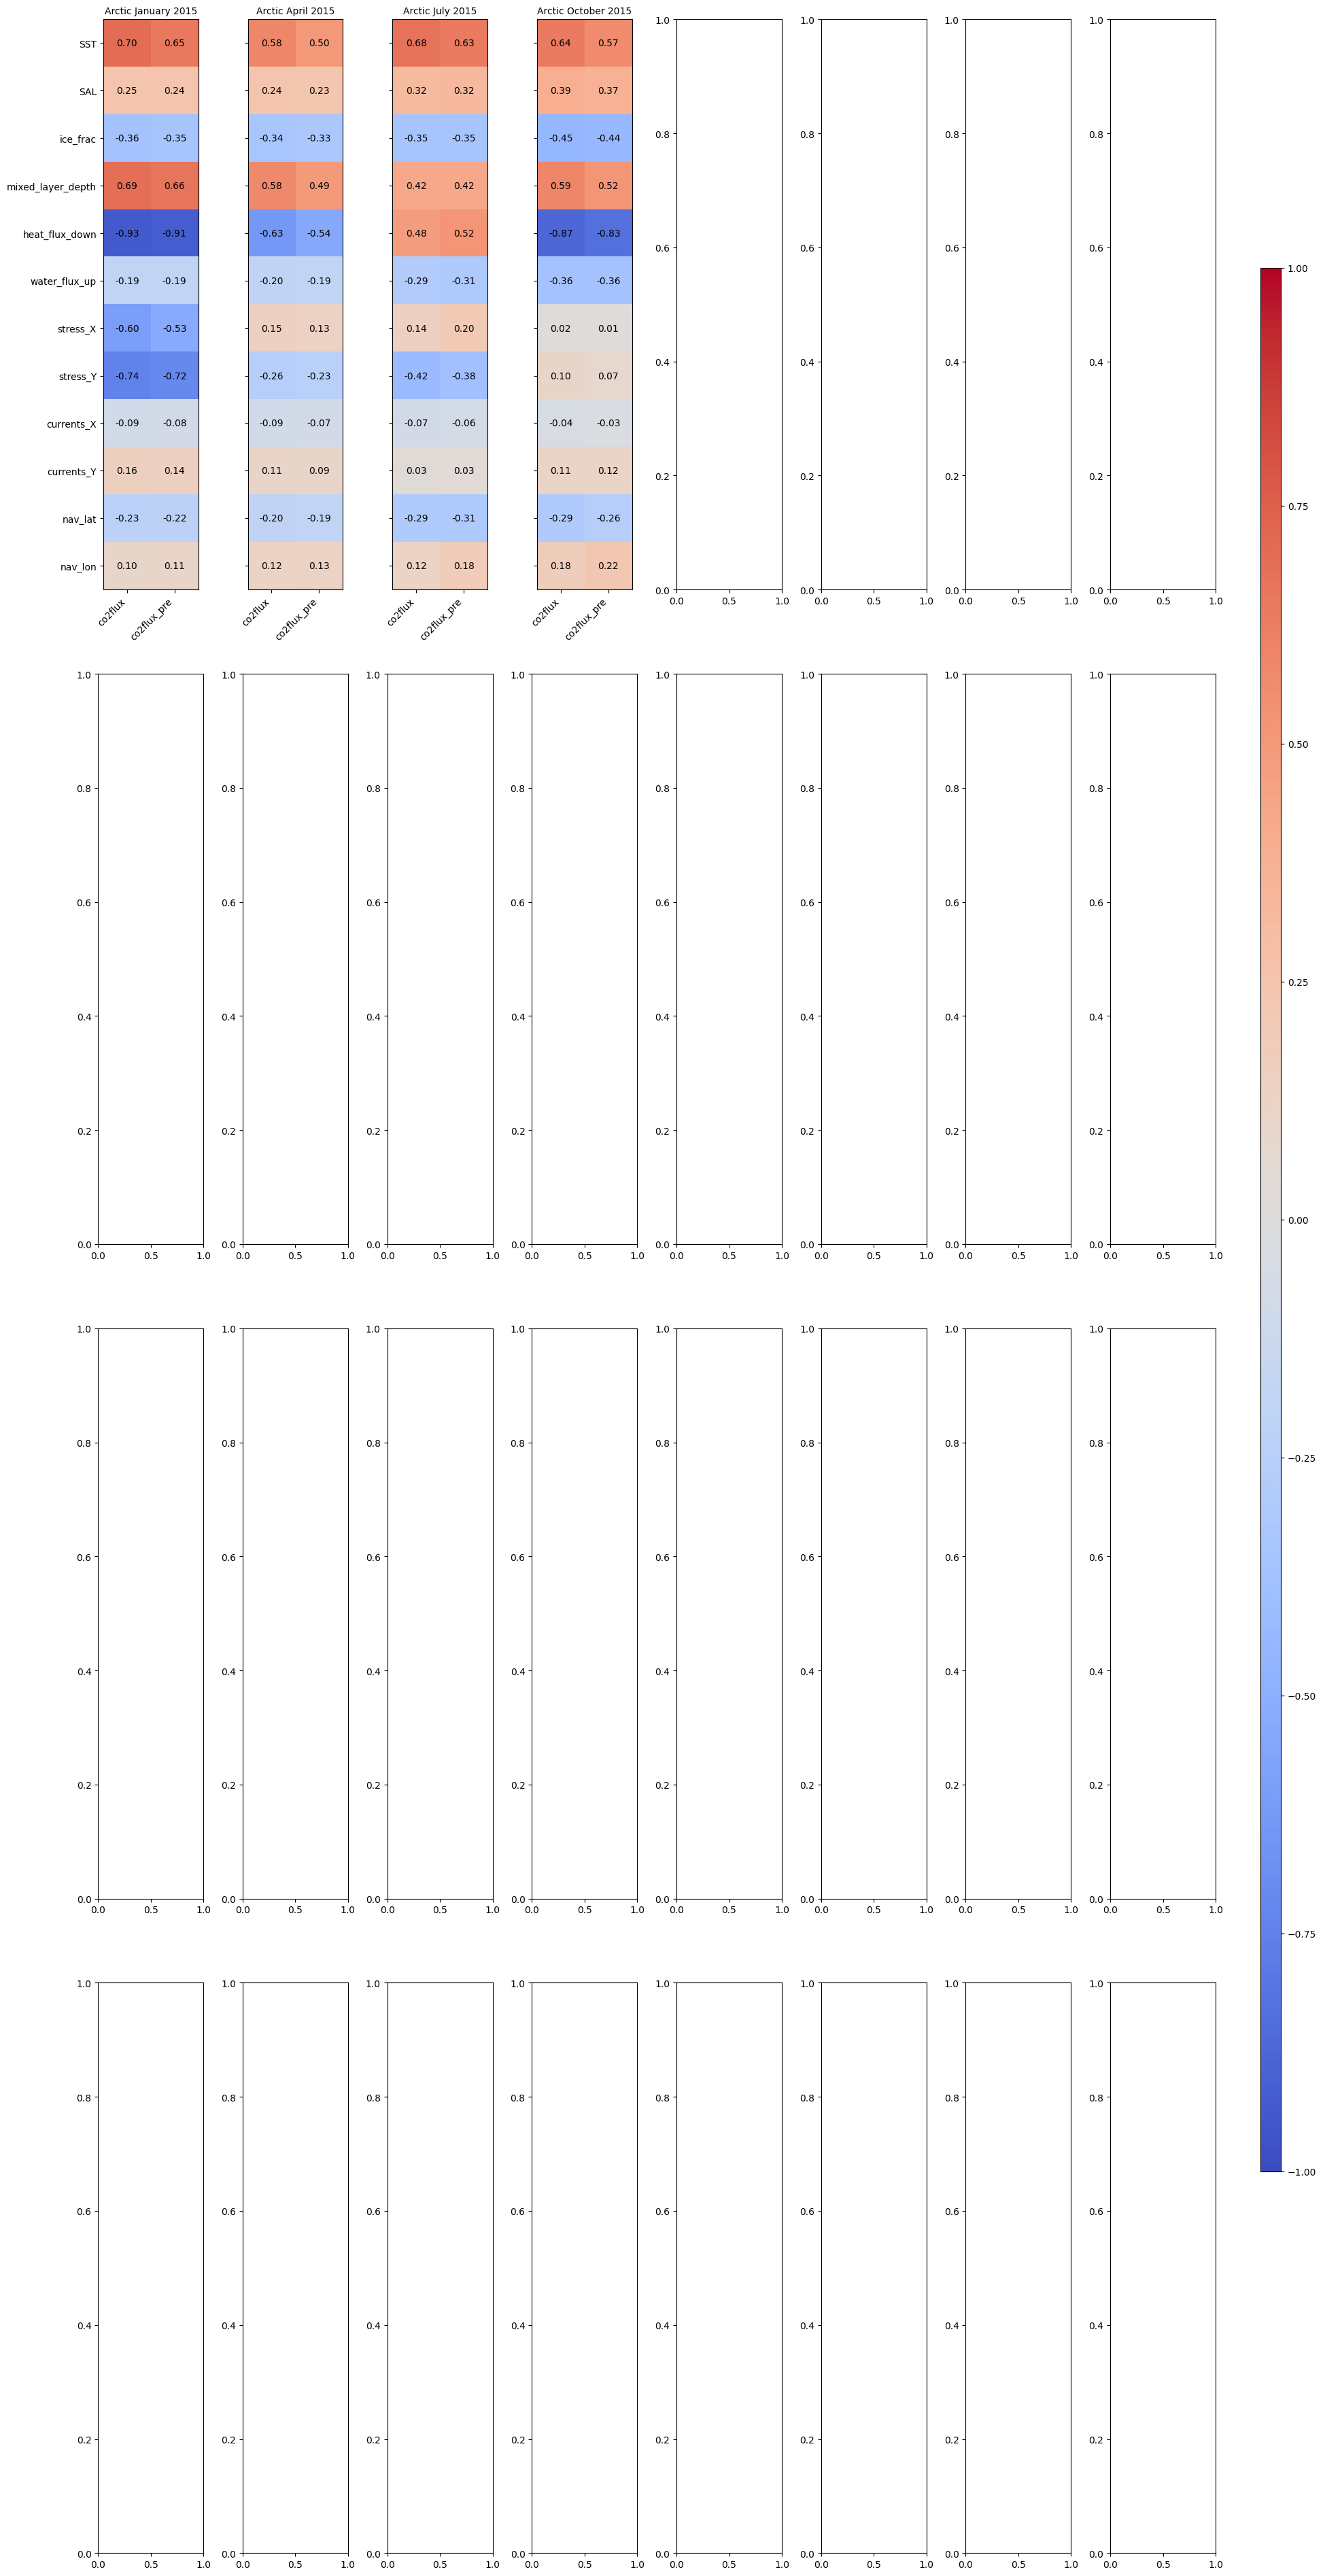

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(20, 40))  # 32 subplots
axes = axes.flatten()  # Easier indexing
plot_idx = 0  # Track current subplot index

for region_idx in range(len(region_labels)):

    for year_label, df in datasets.items():
        regions = get_zoned_df(df)
        region_df = regions[region_idx]
        for month in months:
            # Prepare data
            month_df = region_df[region_df['month'] == month]
            corr_df = month_df[features + targets].corr().loc[features, targets]

            ax = axes[plot_idx]
            im = ax.imshow(corr_df, cmap='coolwarm', vmin=-1, vmax=1)

            ax.set_xticks(np.arange(len(targets)))
            ax.set_yticks(np.arange(len(features)))
            if plot_idx % 8 == 0:
                ax.set_yticklabels(features, fontsize=10)  # show y-axis labels
            else:
                ax.set_yticklabels([])  
            ax.set_xticklabels(targets, rotation=45, ha='right', fontsize=10)

            # Annotate cells
            for i in range(len(features)):
                for j in range(len(targets)):
                    val = corr_df.iloc[i, j]
                    val = 0.0 if np.isnan(val) else val
                    ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=10, color='black')

            title = f"{region_labels[region_idx]} {month_labels[month]} {year_label}"
            wrapped_title = "\n".join(textwrap.wrap(title, width=20))
            ax.set_title(wrapped_title, fontsize=10)
            plot_idx += 1

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax)

# plt.subplots_adjust(hspace=0.2, wspace=0.3)
plt.tight_layout(h_pad=3.0, rect=[0, 0, 0.9, 0.95])  # Leave space for colorbar
plt.savefig("correlation_grid.pdf", dpi=600)
plt.show()


/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_ARCTIC['zone'] = 'ARCTIC'
/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_SOUTHERN_OCEAN['zone'] = 'SOUTHERN_OCEAN'
/var/folders/ns/4sxfm4t95836d2h_1wgqvzdh0000gn/T/ipykernel_20589/3581613547.py:81: UserWarning: This figure includes Axes that are not com

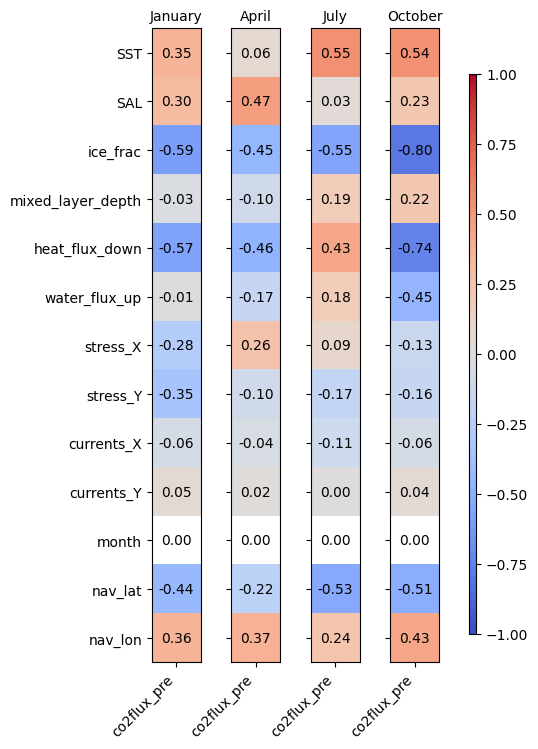

In [20]:
import os

# IMPORT DATA

# specify path to test data
test_data_path = "../../../../../../../Volumes/T7Shield/preprocessed_exp1"

start_year = 2015
end_year = 2015

start_index = (start_year-1958)*12+1
end_index = (end_year-1957)*12+1

# load test data
feature_files = [os.path.join(test_data_path, f"{i}_features.npy") for i in range(start_index, end_index)]
target_files = [os.path.join(test_data_path, f"{i}_targets.npy") for i in range(start_index, end_index)]

features = np.stack([np.load(fp) for fp in feature_files])
target_values = np.stack([np.load(fp) for fp in target_files])

target_values = target_values[..., 3]

n_samples, h, w, n_features = features.shape
X_test_reshaped = features.reshape(-1, n_features)

mask = X_test_reshaped[:, 11] == 1
X_test_reshaped = X_test_reshaped[mask]
target_values = target_values.reshape(-1, 1)[mask]

X_test_reshaped = np.delete(X_test_reshaped, 15, axis=-1)
X_test_reshaped = np.delete(X_test_reshaped, 12, axis=-1)
X_test_reshaped = np.delete(X_test_reshaped, 11, axis=-1)

features = ['SST', 'SAL', 'ice_frac', 'mixed_layer_depth', 'heat_flux_down', 'water_flux_up', 'stress_X', 'stress_Y', 'currents_X', 'currents_Y',
            'month','nav_lat', 'nav_lon']
targets = ['co2flux_pre']

df = pd.DataFrame(X_test_reshaped, columns=features)
df['co2flux_pre'] = target_values

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(5, 8))  # 32 subplots
axes = axes.flatten()  # Easier indexing
plot_idx = 0  # Track current subplot index

regions = get_zoned_df(df)
region_df = regions[0]
for month in months:
    # Prepare data

    month_df = region_df[region_df['month'] == month]
    corr_df = month_df[features + targets].corr(method='spearman').loc[features, targets]

    ax = axes[plot_idx]
    im = ax.imshow(corr_df, cmap='coolwarm', vmin=-1, vmax=1)

    ax.set_xticks(np.arange(len(targets)))
    ax.set_yticks(np.arange(len(features)))
    if plot_idx % 8 == 0:
        ax.set_yticklabels(features, fontsize=10)  # show y-axis labels
    else:
        ax.set_yticklabels([])  
    ax.set_xticklabels(targets, rotation=45, ha='right', fontsize=10)

    # Annotate cells
    for i in range(len(features)):
        for j in range(len(targets)):
            val = corr_df.iloc[i, j]
            val = 0.0 if np.isnan(val) else val
            ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=10, color='black')

    title = f"{month_labels[month]}"
    wrapped_title = "\n".join(textwrap.wrap(title, width=20))
    ax.set_title(wrapped_title, fontsize=10)
    plot_idx += 1

# Shared colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax)

# plt.subplots_adjust(hspace=0.2, wspace=0.3)
plt.tight_layout(h_pad=3.0, rect=[0, 0, 0.9, 0.95])  # Leave space for colorbar
plt.savefig("correlation_grid.pdf", dpi=600)
plt.show()

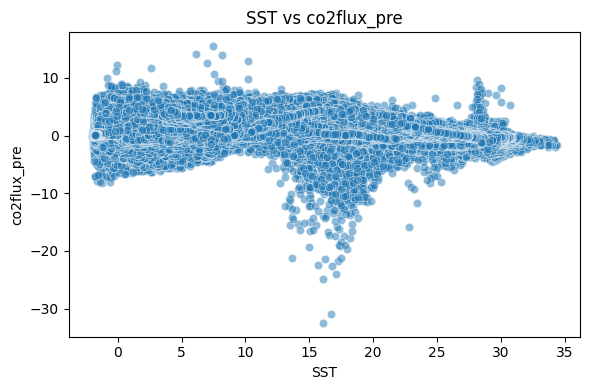

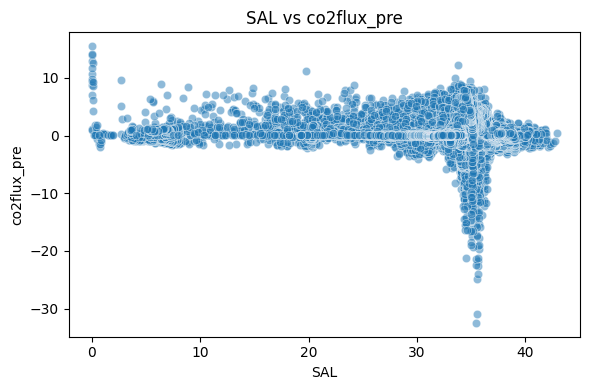

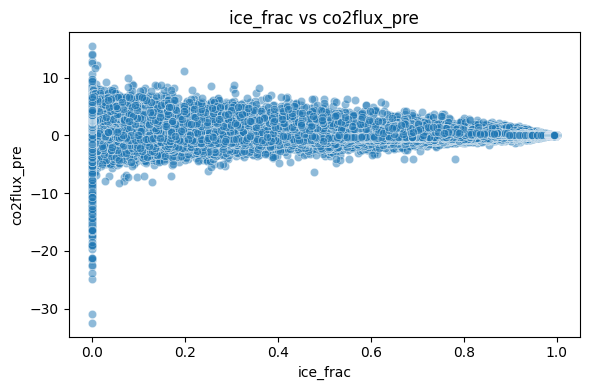

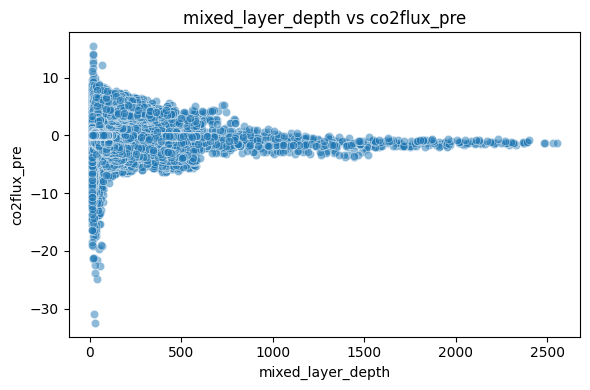

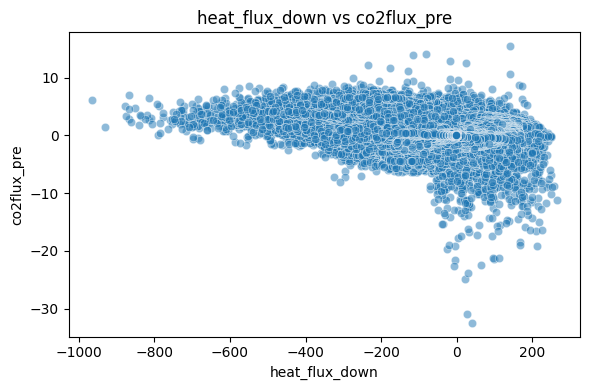

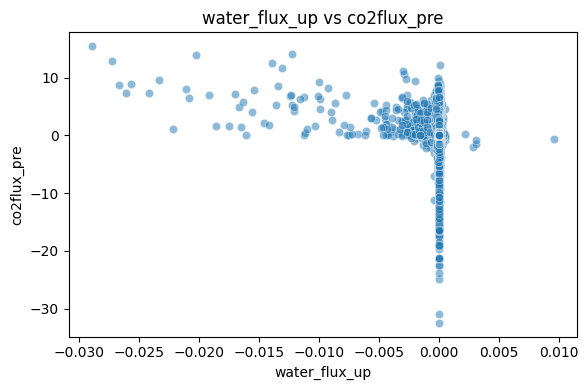

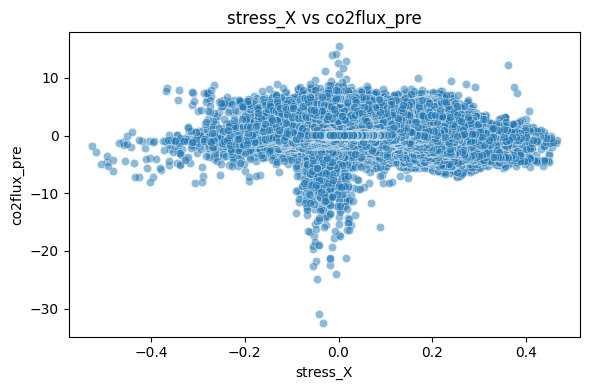

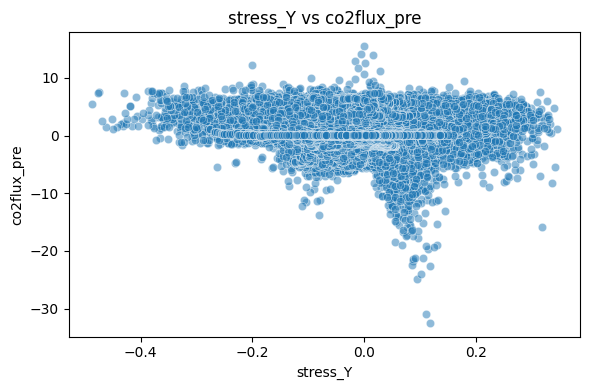

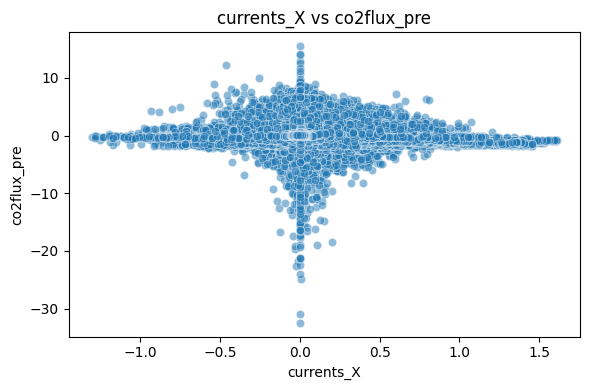

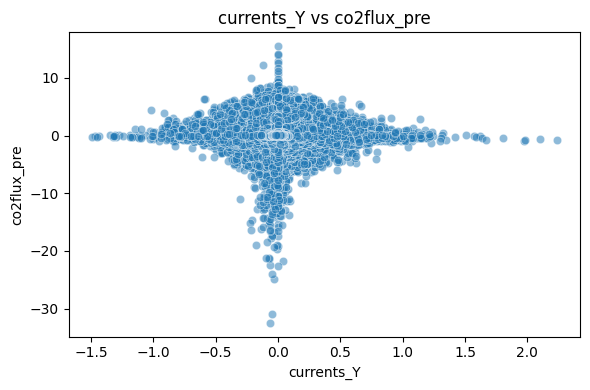

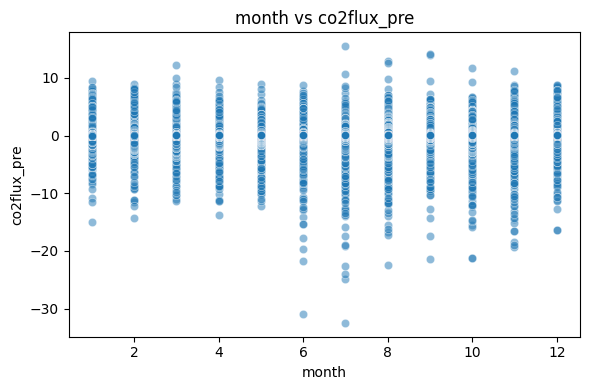

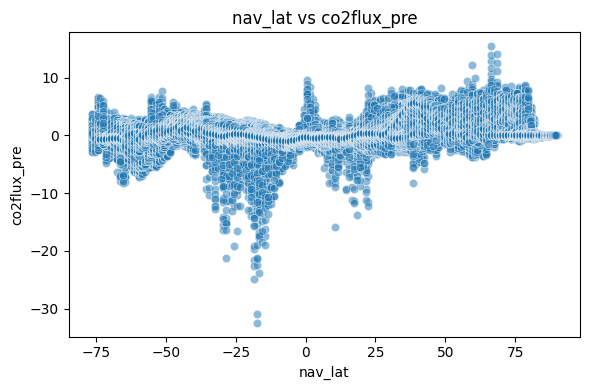

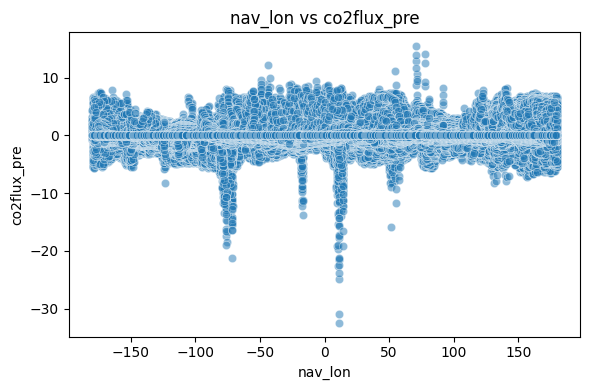

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

target = 'co2flux_pre'  # your target column name

# Get all feature columns except the target
features = [col for col in df.columns if col != target]

# Loop over features
for feat in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feat], y=df[target], alpha=0.5)
    plt.title(f'{feat} vs {target}')
    plt.xlabel(feat)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_ARCTIC['zone'] = 'ARCTIC'
/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_SOUTHERN_OCEAN['zone'] = 'SOUTHERN_OCEAN'


Arctic
January
Arctic
April
Arctic
July
Arctic
October
North Atlantic
January
North Atlantic
April
North Atlantic
July
North Atlantic
October
Equatorial Pacific
January
Equatorial Pacific
April
Equatorial Pacific
July
Equatorial Pacific
October
Southern Ocean
January
Southern Ocean
April
Southern Ocean
July
Southern Ocean
October


/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_ARCTIC['zone'] = 'ARCTIC'
/Users/jakobmeggendorfer/Documents/CAU/Masterarbeit/master-thesis/notebooks/utils/ocean_basins.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_SOUTHERN_OCEAN['zone'] = 'SOUTHERN_OCEAN'


Arctic
January
Arctic
April
Arctic
July
Arctic
October


/var/folders/ns/4sxfm4t95836d2h_1wgqvzdh0000gn/T/ipykernel_89452/1231838584.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 8))


North Atlantic
January
North Atlantic
April
North Atlantic
July
North Atlantic
October
Equatorial Pacific
January
Equatorial Pacific
April
Equatorial Pacific
July
Equatorial Pacific
October
Southern Ocean
January
Southern Ocean
April
Southern Ocean
July
Southern Ocean
October


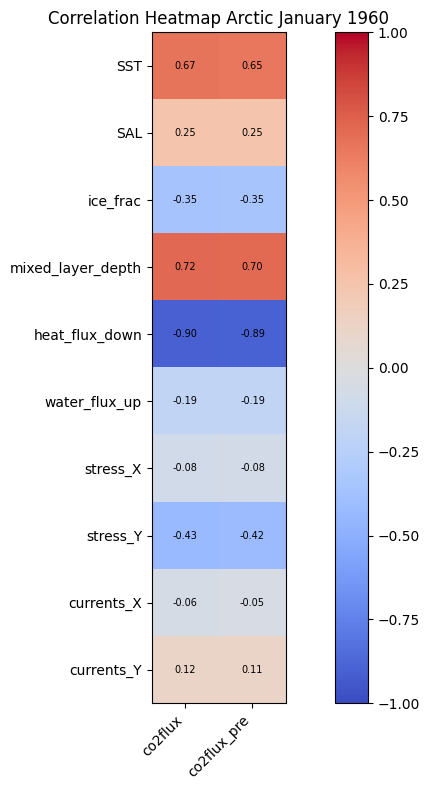

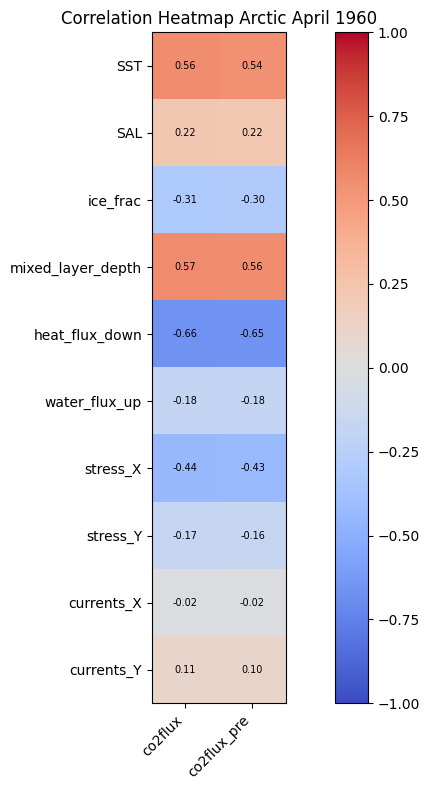

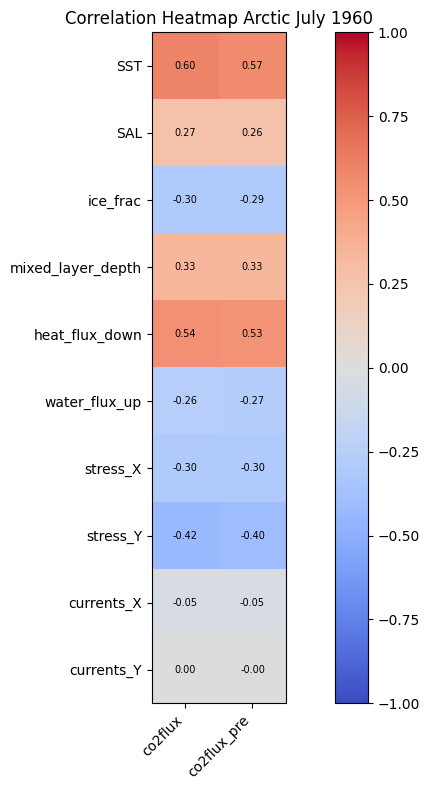

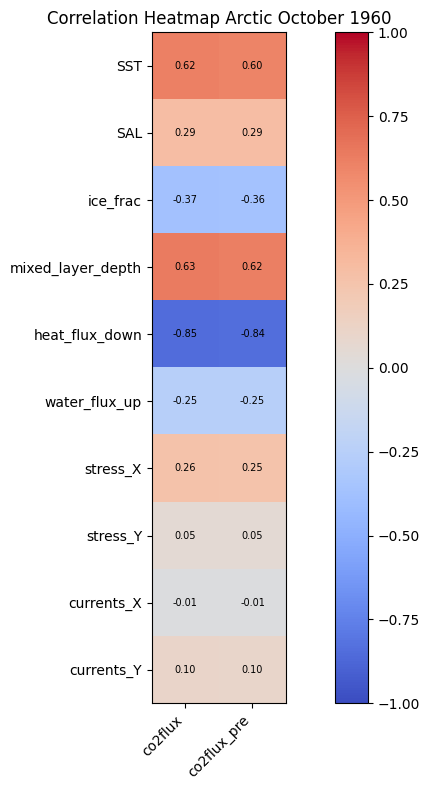

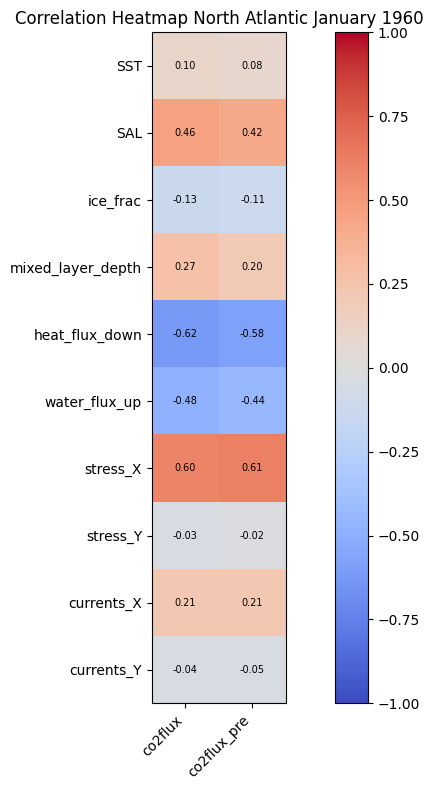

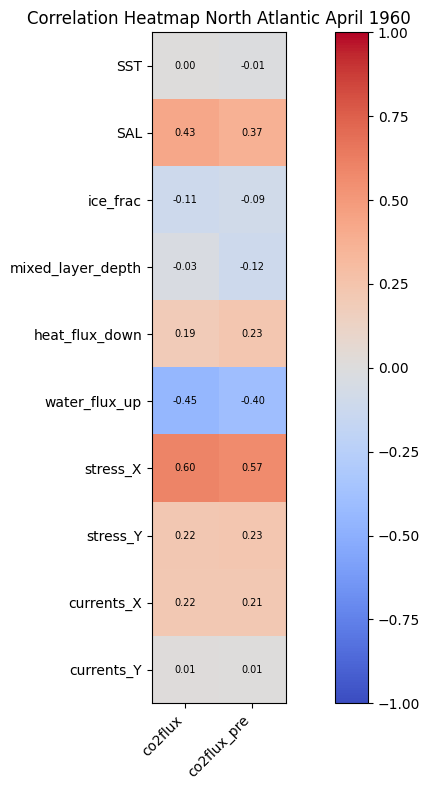

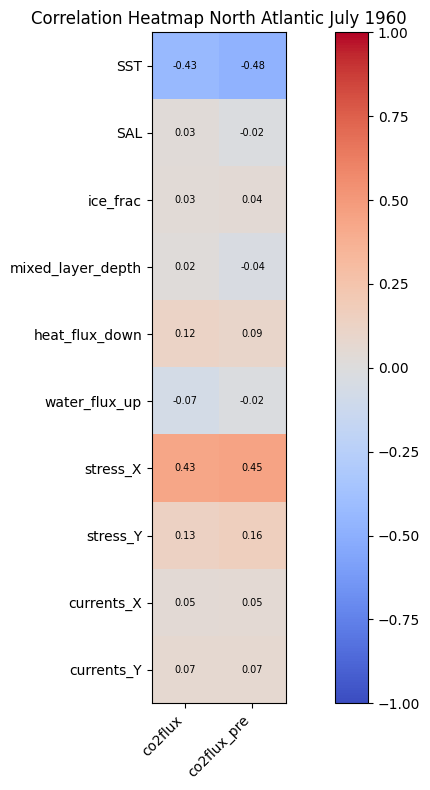

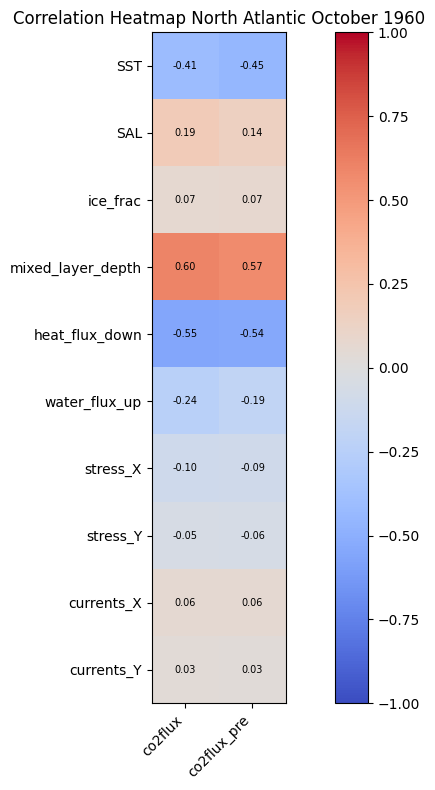

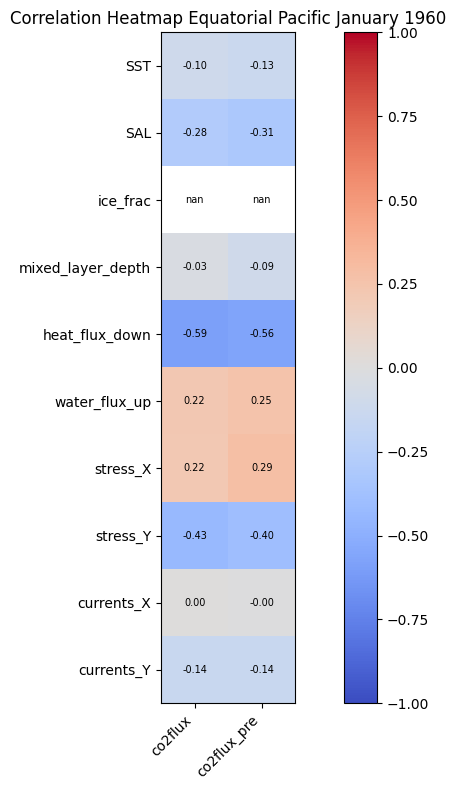

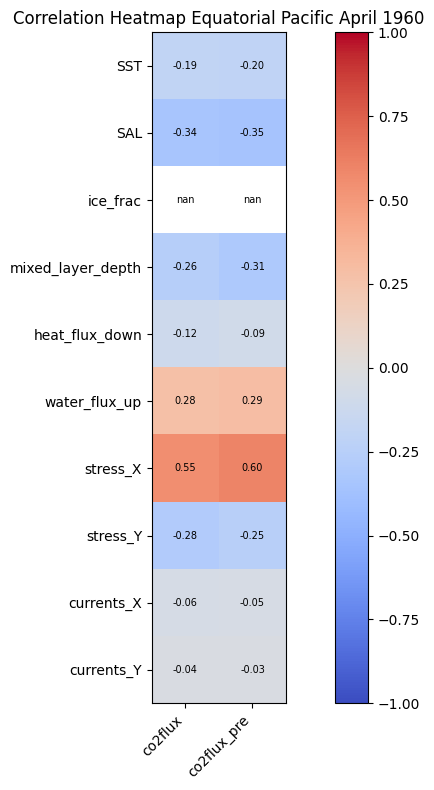

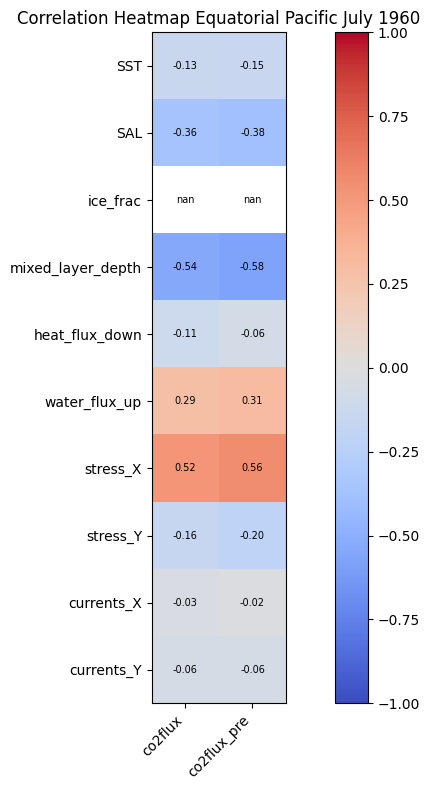

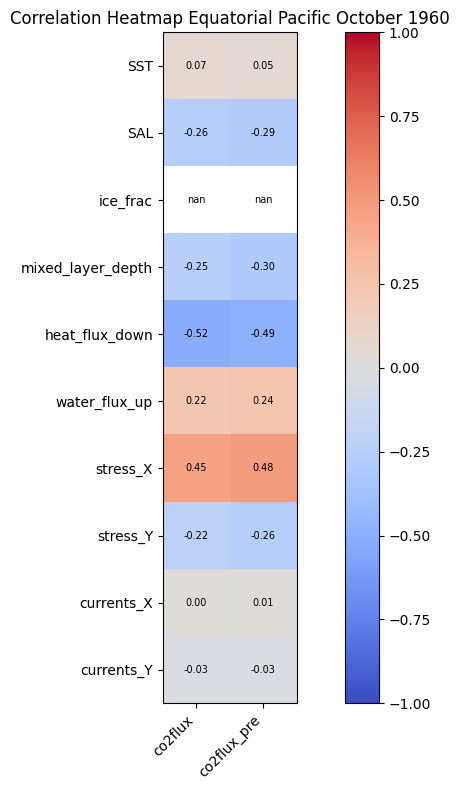

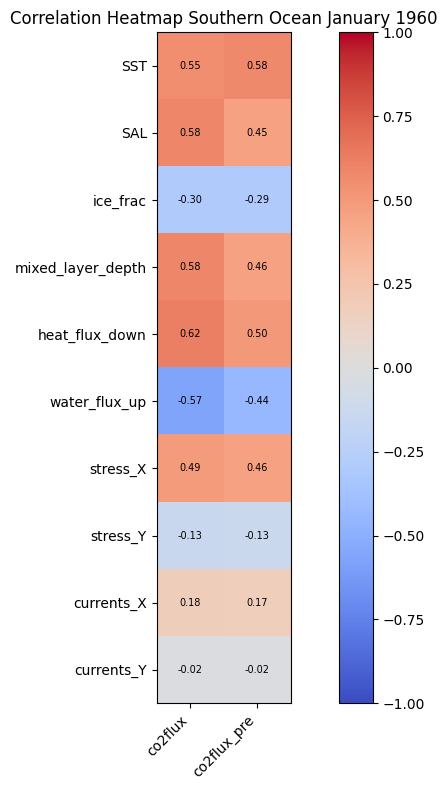

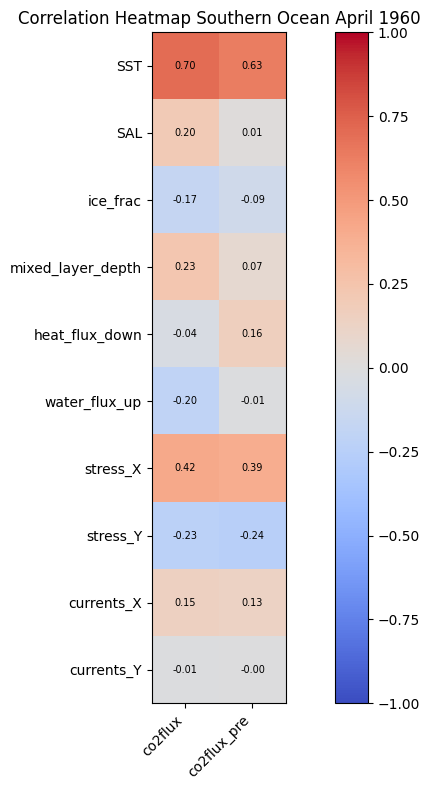

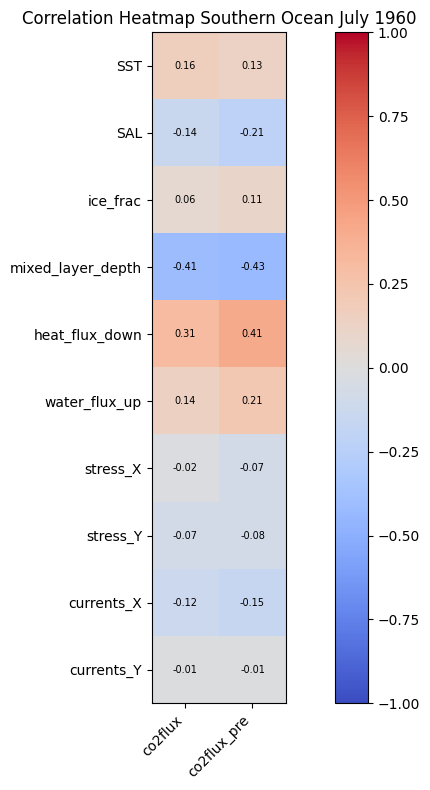

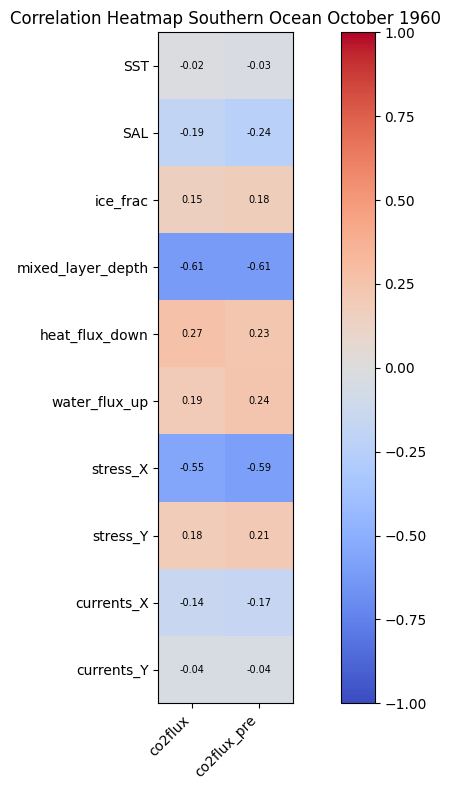

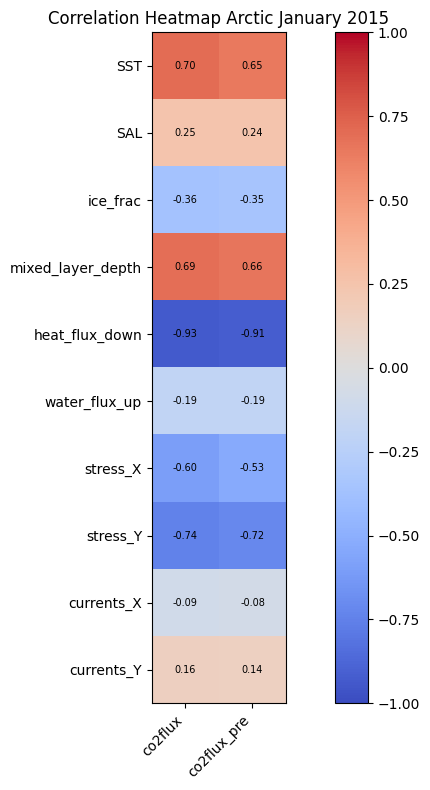

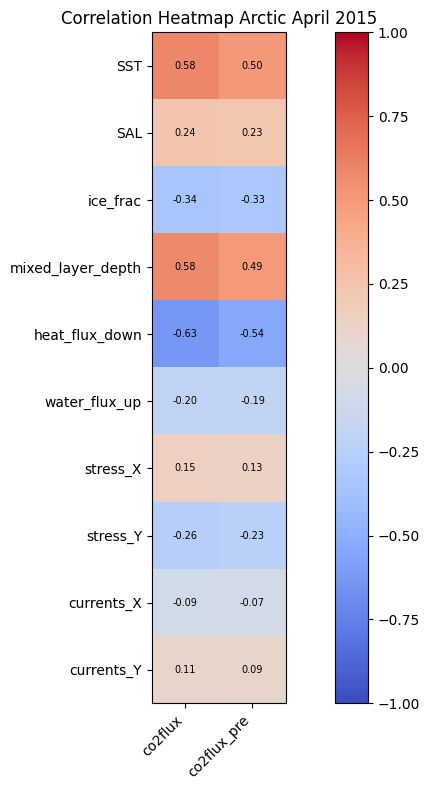

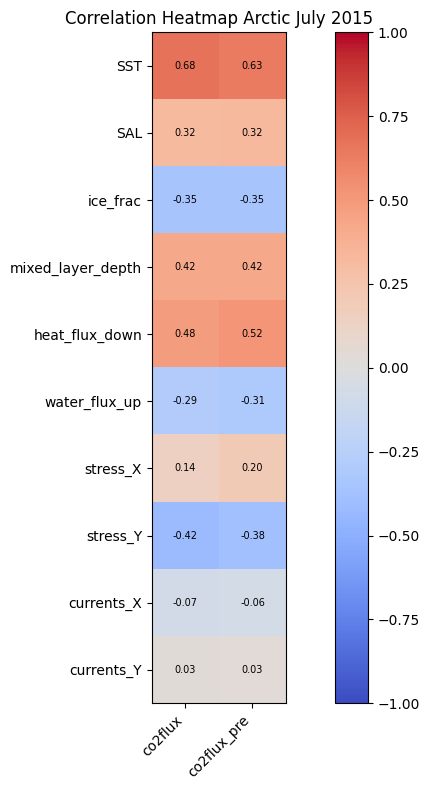

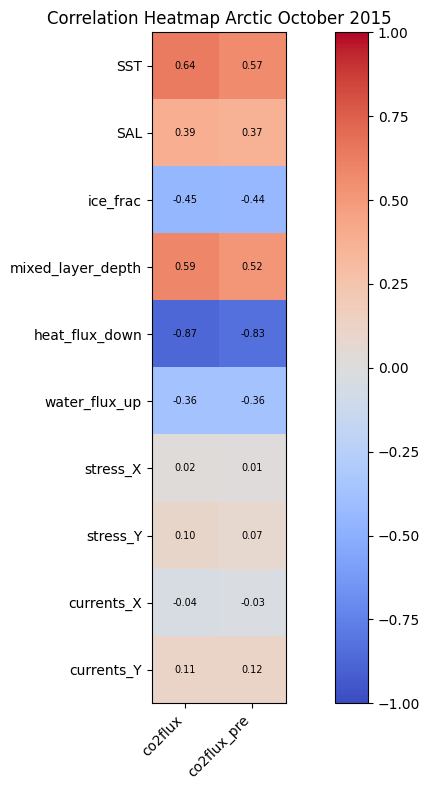

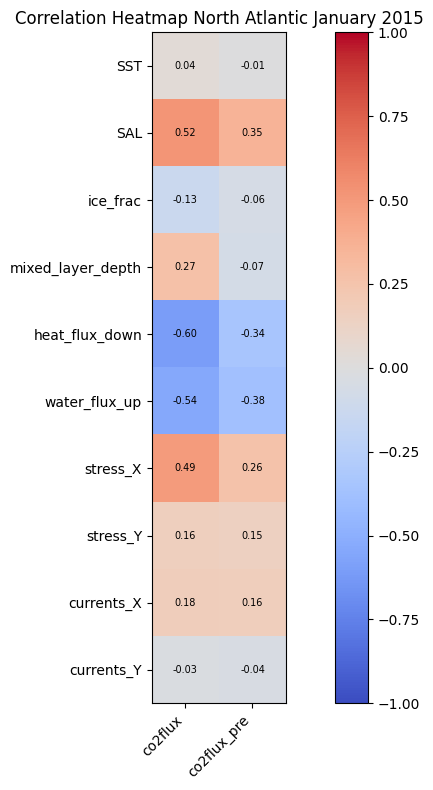

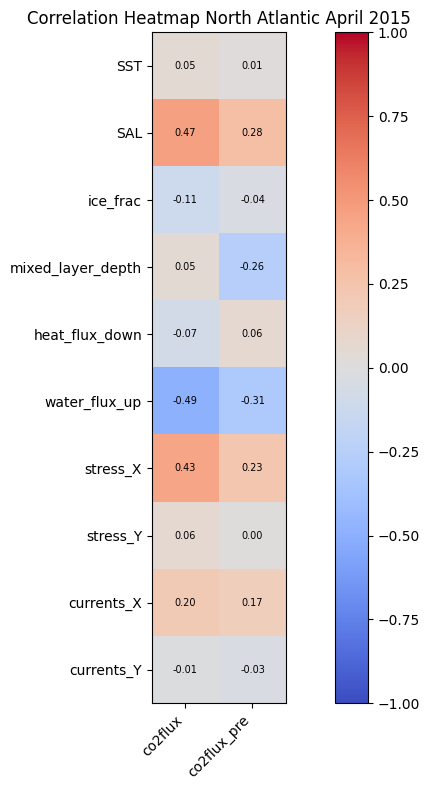

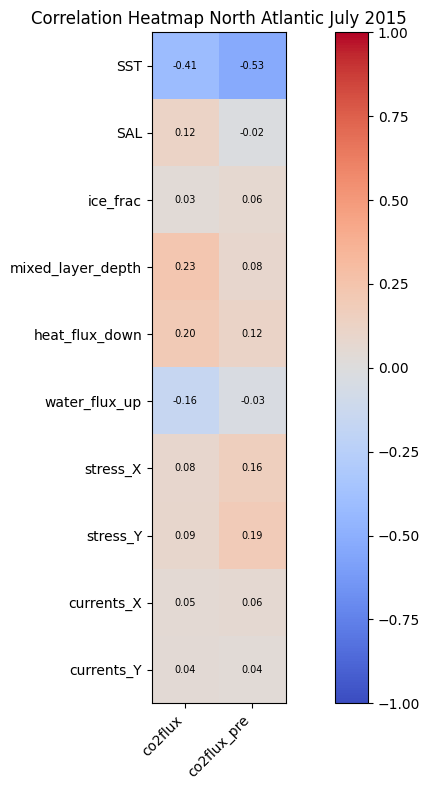

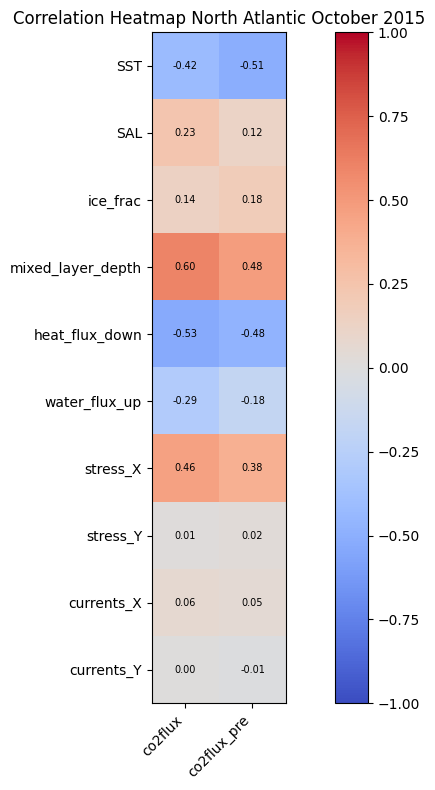

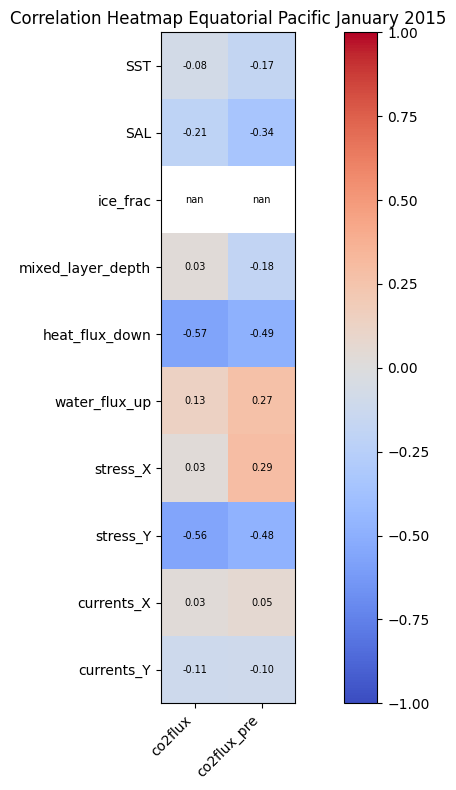

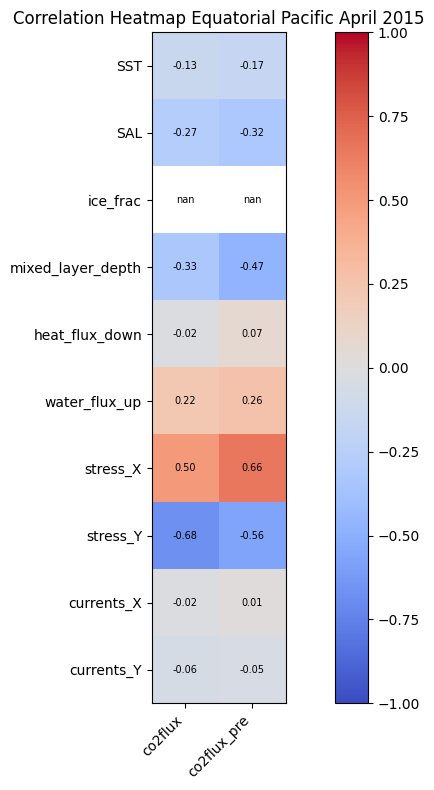

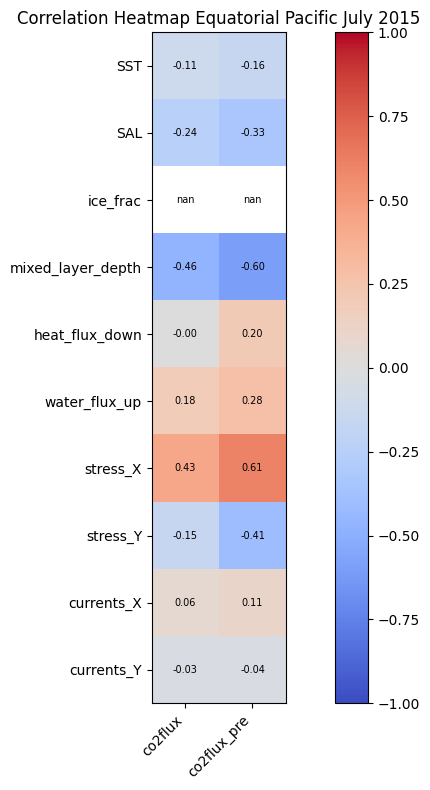

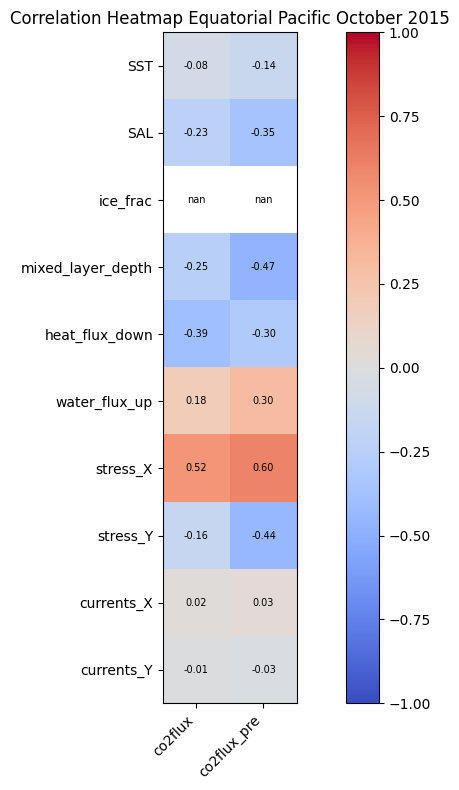

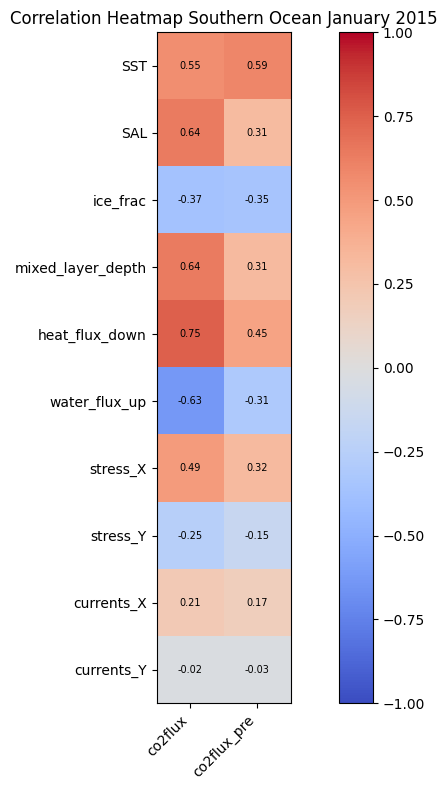

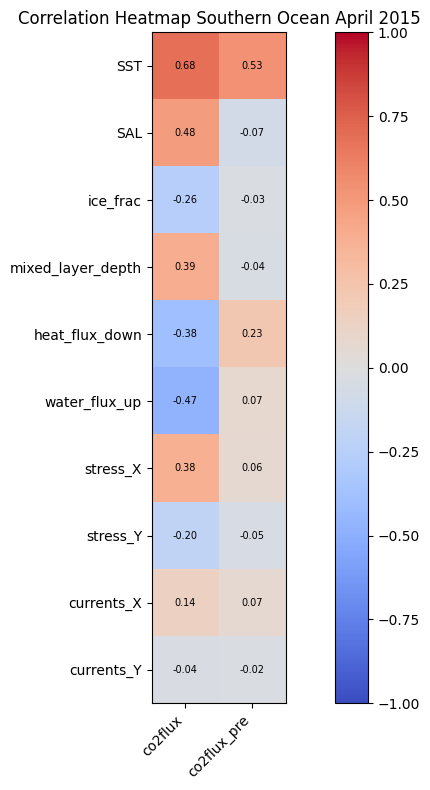

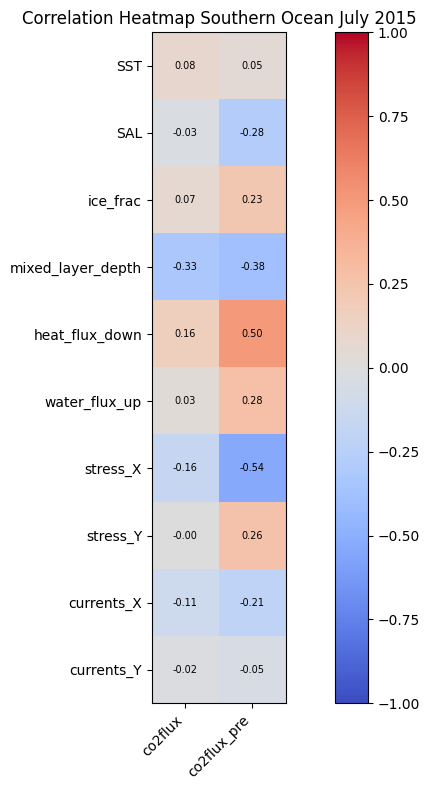

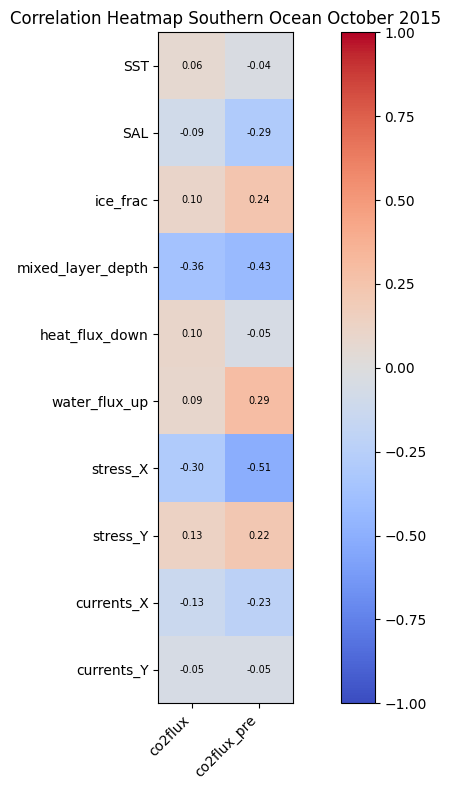

In [7]:
for year_label, df in datasets.items():
    regions = get_zoned_df(df)  # returns a list of 4 DataFrames

    for region_idx, region_df in enumerate(regions):
        for month in months:
            # Filter by month
            month_df = region_df[region_df['month'] == month]
            corr_df = month_df[features+targets].corr().loc[features, targets]

           # Compute correlation matrix
            # corr_matrix = corr_df.corr()

            # Plot heatmap
            fig, ax = plt.subplots(figsize=(10, 8))
            cax = ax.imshow(corr_df, cmap='coolwarm', vmin=-1, vmax=1)

            # Add colorbar
            fig.colorbar(cax)

            # Set ticks
            ax.set_xticks(np.arange(len(targets)))
            ax.set_yticks(np.arange(len(features)))
            ax.set_xticklabels(targets, rotation=45, ha='right')
            ax.set_yticklabels(features)

            # Add correlation values in the cells
            for i in range(len(features)):
                for j in range(len(targets)):
                    text = f"{corr_df.iloc[i, j]:.2f}"
                    ax.text(j, i, text, ha='center', va='center', color='black', fontsize=7)

            print(region_labels[region_idx])
            print(month_labels[month])

            ax.set_title("Correlation Heatmap " + region_labels[region_idx] + " " + month_labels[month] + " " + year_label)
            plt.tight_layout()
            plt.savefig("../plots/general/heatmaps_variant/heatmap_" + region_labels[region_idx] + "_" + month_labels[month] + "_" + year_label + ".png", dpi=300, bbox_inches='tight')